In [4]:
import numpy as np
import sep
import pickle
import matplotlib.pyplot as plt

In [92]:
def makeCatalog(images, lvl=3):
    ''' Creates a detection catalog by combining low and high resolution data
    This function is used for detection before running scarlet.
    It is particularly useful for stellar crowded fields and for detecting high frequency features.
    Parameters
    ----------
    images: array
        2D array of Data objects
    lvl: 
        detection threshold in units of sigma
    Returns
    -------
    catalog: sextractor catalog
        catalog of detected sources
    bg_rms: array
        background level for each data set
    '''
    
    bkg = sep.Background(images)
    catalog = sep.extract(images, lvl, err=bkg.globalrms)

    return catalog, bkg


def get_fluxes(images, index):

    catalogs = []
    flux1 = []
    flux2 = []
    imx1, imy1 = 0, 0
    imx2, imy2 = 0, 0
    sigma = 1

    for i in range(len(images[index])):
        catalog, _ = makeCatalog(images[index][i])

        # Asign x and y coordinates to images
        if imx1 == 0 and imy1 == 0:
            if len(catalog['x']) == 1:
                imx1 = catalog['x']
                imy1 = catalog['y']
            elif len(catalog['x']) == 2:
                imx1 = catalog['x'][0]
                imy1 = catalog['y'][0]
                imx2 = catalog['x'][1]
                imy2 = catalog['y'][1]

        if len(catalog) == 1:
            # Belongs to image 1?
            if abs(catalog['x'] - imx1) < sigma and abs(catalog['y'] - imy1) < sigma:
                flux1.append(catalog['flux'])
                flux2.append(np.nan)
            else:
                # Check if x and y coordinates for image 2 have already been assigned
                if imx2 == 0 and imy2 == 0:
                    imx2 = catalog['x'][1]
                    imy2 = catalog['y'][1]
            # Belongs to image 2?
            elif abs(catalog['x'] - imx2) < sigma and abs(catalog['y'] - imy2) < sigma:
                flux2.append(catalog['flux'])
                flux1.append(np.nan)

        elif len(catalog) == 2:
            # Check if x and y coordinates for image 2 have already been assigned
            if imx2 == 0 and imy2 == 0:
                imx2 = catalog['x'][1]
                imy2 = catalog['y'][1]

            # Assign fluxes
            flux1.append(catalog['flux'][0])
            flux2.append(catalog['flux'][1])

        catalogs.append(catalog)
        
    return flux1, flux2, catalogs

In [10]:
path = '../processed_data/Cadence_evaluationset_doubles/LSST_numimages=2_band=i_fixedH0=True_microlensing=False_batch001.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)
    
images = data['time_series']
td = data['time_delay']

/var/folders/6x/j1tbqdk91439t5vn1y800sb40000gn/T/ipykernel_53054/1203103968.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(f)


2
0
3
0
4
0
5
0
6
0
7
0
8
0
12
21.427171446916695
13
21.427171446916695
14
21.427171446916695
15
21.427171446916695
[nan, nan, nan, nan, nan, nan, nan, 589.1082153320312, 1326.9788818359375, 1523.26318359375, array([1456.81213379]), array([1095.57495117]), array([1504.92614746]), array([277.00149536])]


Text(0, 0.5, 'Flux')

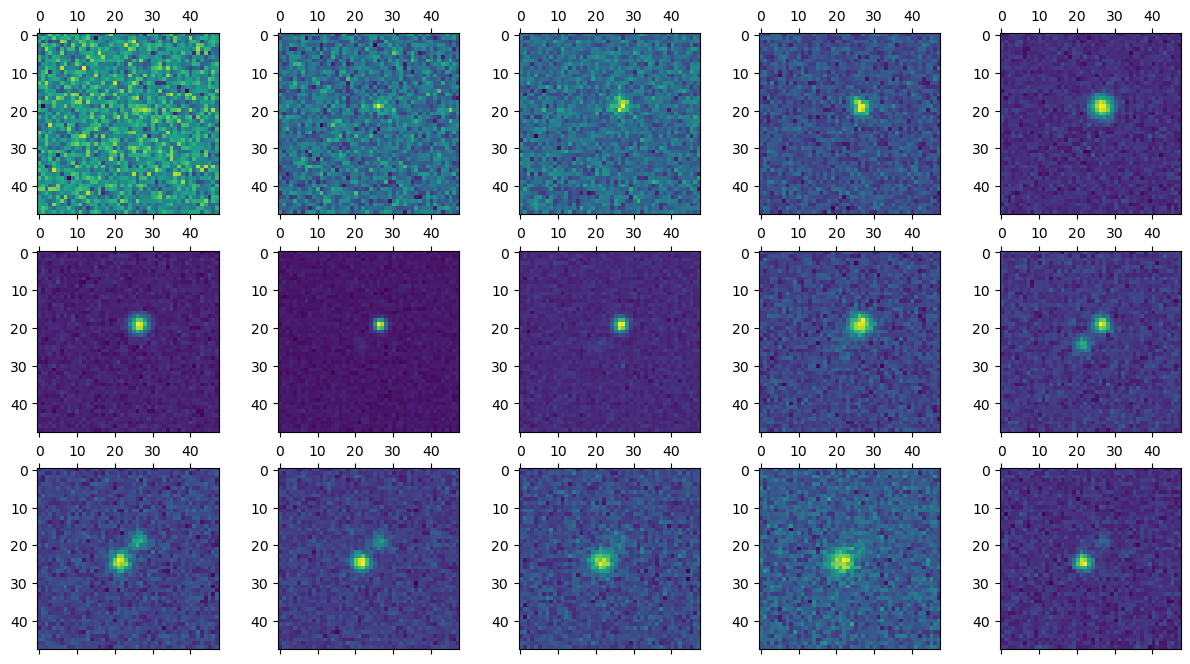

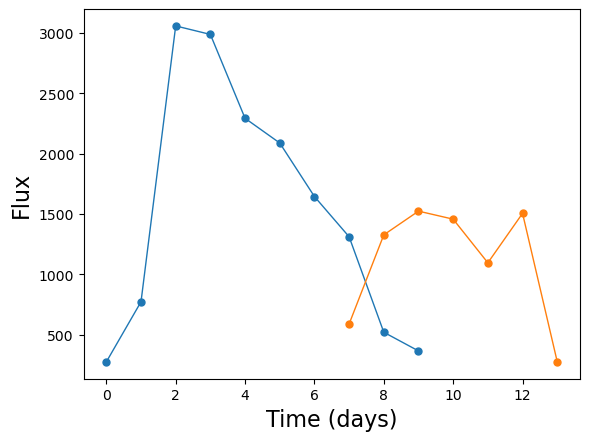

In [94]:
index = 2

flux1, flux2, catalogs = get_fluxes(images, index)

# Plot image time-series
fig, ax = plt.subplots(3, 5, figsize=(15, 8))
axes = ax.flatten()
for i in range(len(axes)):
    axes[i].matshow(images[index][i])
    
print(flux2)

# Plot fluxes
plt.figure()
plt.plot(flux1, '.', color='C0', ms=10)
plt.plot(flux1, color='C0', lw=1)
plt.plot(flux2, '.', color='C1', ms=10)
plt.plot(flux2, color='C1', lw=1)
plt.xlabel("Time (days)", fontsize=16)
plt.ylabel("Flux", fontsize=16)

In [60]:
catalog, _ = makeCatalog(images[index][9])

print(len(catalog))
print(" ")

print(catalog['flux'])
print(catalog['x'], catalog['y'])

2
 
[1311.01049805  589.10821533]
[26.29861231 21.42717145] [19.1881665  24.46603375]
